# [Lab 1](https://github.com/materialsvirtuallab/nano281/tree/master/labs/lab1)
Minghao LI A53323531


assessment criteria:
* Model performance: 30%
* Materials Science Insights: 30%
* Data Science Technique: 30%
* Programming Style: 10%

We will explore various sources of materials data:
* Large public databases with API (Materials Project)
* Shared research data (figshare)

## Q1-Materials Project data
Using **pymatgen** (or any alternative approach), query the Materials Project for the following properties of all ABO3 type compounds (hint: look at this example notebook and figure out what is the best way to do this):

* materials project identifier (this is called task_id)
* formula of the compound
* number of sites in the unit cell
* band gap
* formation energy per atom
* icsd ids (note that icsd_id key is no longer used, use icsd_ids instead)
* energy above hull


## Q1-Answer
1. Shown in follwing code;
2. **2398** compounds in total. **1311** unique ABO3 formula. the polymorphs is about **1.83**;
3. about **0.36** of the compounds have at least one icsd id;
4. Shown in code
5. Shown in code
6. Shown in code

In [1]:
# Q 1.1 Perform the query and convert the data into a Pandas DataFrame.

## Started by importing MPRester, which is available from the root import of pymatgen.
from pymatgen import MPRester
import pandas as pd


# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places: 
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard
mpr = MPRester("leO5xwKs0R4aVCSf")

## Get all the compouds with the form of "ABO3" and its 7 properties.
data = mpr.query("**O3", properties=["task_id","pretty_formula",
                                     "nsites","band_gap",
                                     "formation_energy_per_atom",
                                     "icsd_ids","e_above_hull"])

# Then reads in the data as a pandas DataFrame
df = pd.DataFrame(data)
ncrystal = len(df)

# df.head()
df.info()

/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)
/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/pymatgen/core/periodic_table.py:426: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  % self.symbol)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   task_id                    2398 non-null   object 
 1   pretty_formula             2398 non-null   object 
 2   nsites                     2398 non-null   int64  
 3   band_gap                   2398 non-null   float64
 4   formation_energy_per_atom  2398 non-null   float64
 5   icsd_ids                   2398 non-null   object 
 6   e_above_hull               2398 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 131.3+ KB


In [2]:
# Q1.2.1
# the number of unique ABO3: 1311. 

## method1: set()
%time list_unique = list(set(df["pretty_formula"]))
nprettyformula1 = len(list_unique)

## method2: numpy unique()
import numpy as np
%time list_unique1 = np.unique(df["pretty_formula"])
nprettyformula2 = len(list_unique)

## method3: pandas unique()
%time list_unique3 = pd.unique(df["pretty_formula"])
nprettyformula3 = len(list_unique)

nprettyformula1,nprettyformula2,nprettyformula3

CPU times: user 350 µs, sys: 5 µs, total: 355 µs
Wall time: 358 µs
CPU times: user 1.67 ms, sys: 88 µs, total: 1.76 ms
Wall time: 3.15 ms
CPU times: user 701 µs, sys: 92 µs, total: 793 µs
Wall time: 766 µs


(1311, 1311, 1311)

In [3]:
# Q1.2.2
# What is the average number of crystals (also known as polymorphs) per ABO3 formula?What What 

npolymorphs = ncrystal / nprettyformula1
round(npolymorphs,2)

1.83

In [4]:
# Q1.3
# What fraction of the compounds have at least one icsd id?

# method1
res = df[df['icsd_ids'].str.len() != 0 ]
count = len(res)

# Method2 for loop
# df_ids = df["icsd_ids"] 
# len(df_ids)
# count = 0
# for elements in df_ids:
#     if len(elements) is not 0:
#         count += 1

print("count:", count, "; fraction_icsdids:", round(count/ncrystal, 2))


count: 865 ; fraction_icsdids: 0.36


In [5]:
# Q1.4 
# The formation energies in the Materials Project are given in eV/atom.
# Create an additional column in your dataset that has the formation energies in J/mol.

from scipy import constants
constants.Avogadro
df["formation_energy_J_mol"] = df["formation_energy_per_atom"] * constants.Avogadro * constants.e
df

,task_id,pretty_formula,nsites,band_gap,formation_energy_per_atom,icsd_ids,e_above_hull,formation_energy_J_mol
0,mp-1001571,CaFeO3,5,0.0000,-2.282308,[],0.052161,-220209.211787
1,mp-1016821,BaSiO3,5,1.0186,-2.852291,[],0.561269,-275204.228407
2,mp-1016823,BaGeO3,5,0.0000,-2.473919,[],0.232358,-238696.914766
3,mp-1016828,CdIrO3,5,0.0000,-0.851737,[],0.463199,-82180.147468
4,mp-1016833,CaRhO3,5,0.0000,-1.851243,[],0.257081,-178617.828477
...,...,...,...,...,...,...,...,...
2393,mvc-4001,ZnCrO3,20,0.0280,-1.851246,[],0.139167,-178618.057002
2394,mvc-4002,ZnMoO3,20,0.8663,-1.780286,[],0.221352,-171771.468159
2395,mvc-4008,ZnNiO3,20,0.0000,-0.965703,[],0.186033,-93176.163471
2396,mvc-4013,ZnWO3,20,1.7419,-1.768571,[],0.123491,-170641.158703


In [6]:
# Q1.5
# Let us assume that materials with energy above hull of >0.03 eV/atom
# are unstable and are potentially stable otherwise. Furthermore,
# band gaps of 0, (0, 1], [1, +inf) are indicative of metallic, 
# small band gap, large band gap for the materials. 
# Create a table of the number of ABO3 crystals in each joint category, 
# e.g., (unstable, metallic), (unstable, small band gap), etc.

## unstable && metallic
df_unstable_metallic = df[(df["e_above_hull"] > 0.03) & (df["band_gap"] == 0)]
count_unstable_metallic = len(df_unstable_metallic)

## unstable && small band gap
df_unstable_smallbandgap = df[(df["e_above_hull"] > 0.03) & (df["band_gap"] > 0) & (df["band_gap"] <= 1)]
count_unstable_smallbandgap = len(df_unstable_smallbandgap)

## unstable && large band gap
df_unstable_largebandgap = df[(df["e_above_hull"] > 0.03) & (df["band_gap"] > 1)]
count_unstable_largebandgap = len(df_unstable_largebandgap)

## potentially stable && metallic
df_potentiallystable_metallic = df[(df["e_above_hull"] < 0.03) & (df["band_gap"] == 0)]
count_potentiallystable_metallic = len(df_potentiallystable_metallic)

## potentially && small band gap
df_potentiallystable_smallbandgap = df[(df["e_above_hull"] < 0.03) & (df["band_gap"] > 0) & (df["band_gap"] <= 1)]
count_potentiallystable_smallbandgap = len(df_potentiallystable_smallbandgap)

## potentially && large band gap
df_potentiallystable_largebandgap = df[(df["e_above_hull"] < 0.03) & (df["band_gap"] > 1)]
count_potentiallystable_largebandgap = len(df_potentiallystable_largebandgap)

# Create a table of the number of ABO3 crystals in each joint category
categorytable = pd.DataFrame({
    "(unstable, metallic)": [count_unstable_metallic],
    "(unstable, small band gap)": [count_unstable_smallbandgap],
    "(unstable, large band gap)": [count_unstable_largebandgap],
    "(potentially stable, metallic)": [count_potentiallystable_metallic],
    "(potentially stable, small band gap)": [count_potentiallystable_smallbandgap],
    "(potentially stable, large band gap)": [count_potentiallystable_largebandgap]}
    )

categorytable.head()

,"(unstable, metallic)","(unstable, small band gap)","(unstable, large band gap)","(potentially stable, metallic)","(potentially stable, small band gap)","(potentially stable, large band gap)"
0,982,208,469,161,86,492


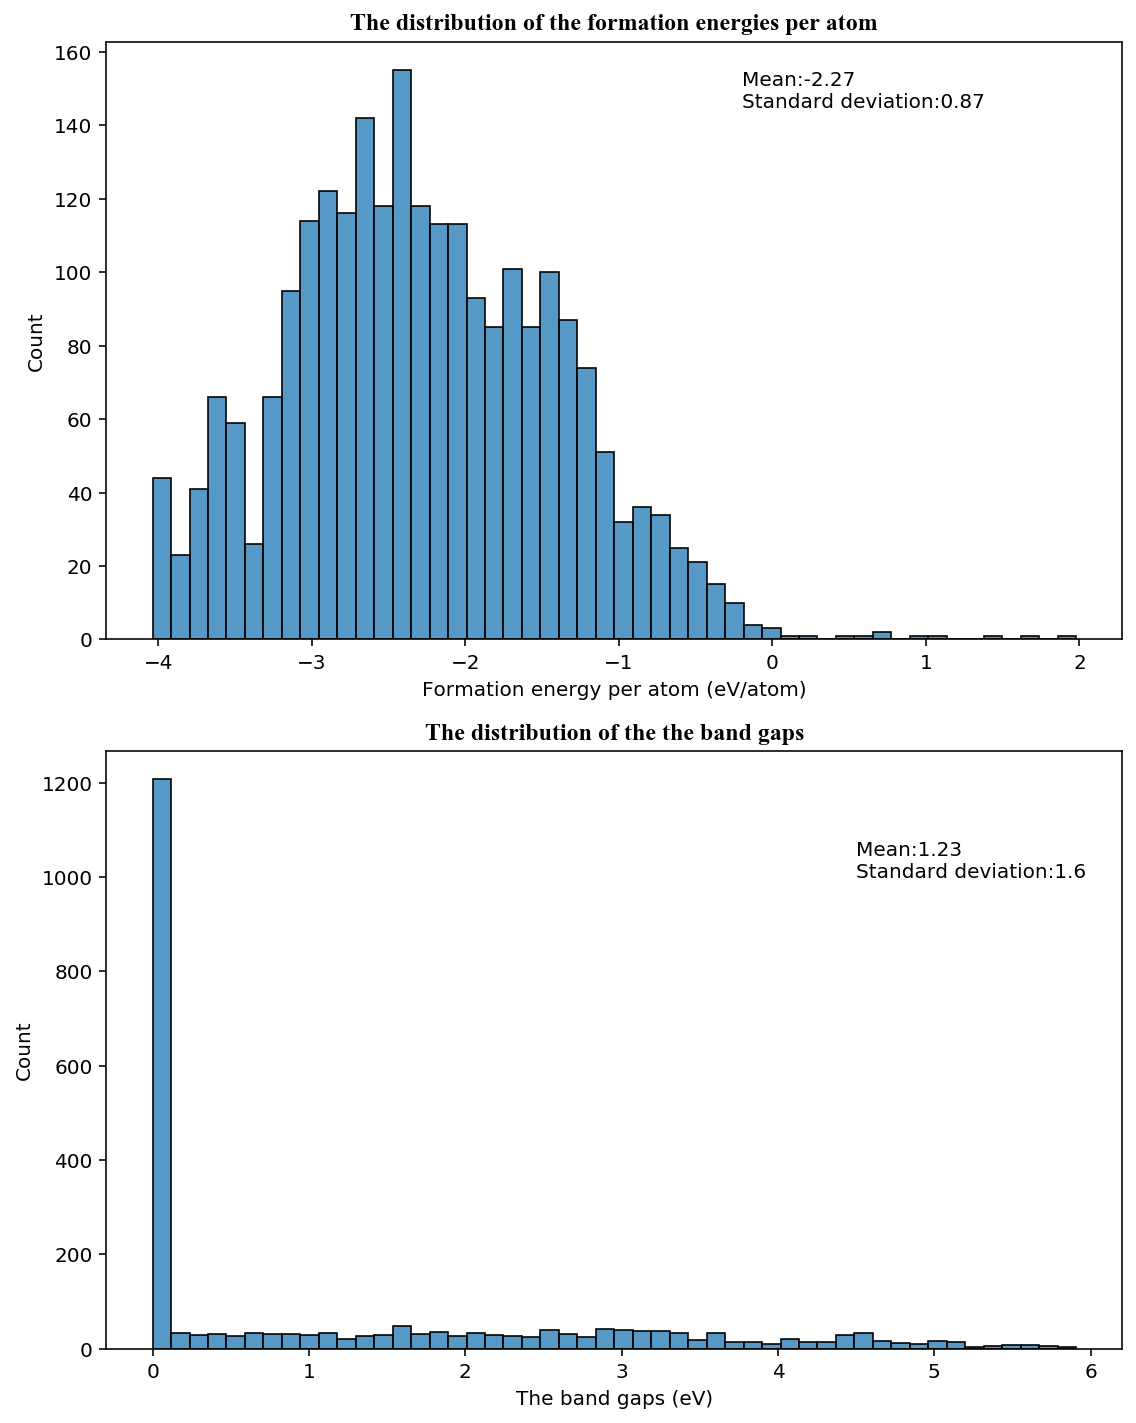

In [7]:
# Q1.6
# Plot the distribution of (a) the formation energies per atom (in eV/atom) 
# and (b) the band gaps of all the materials. 
# Annotate the plots with the average and standard deviation of each quantity. 
# Ensure that all axes are labelled appropriately with units, 
# i.e., something that you can potentially put in a scientific paper.

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format ='retina'

f = plt.figure(figsize = (8,10))

# figure 1
f.add_subplot(2,1,1)
axa = sns.histplot(df["formation_energy_per_atom"], bins = 50)
axa.set_xlabel('Formation energy per atom (eV/atom)', fontsize=10)
axa.set_ylabel('Count', fontsize=10)
axa.set_title('The distribution of the formation energies per atom', family = 'Times New Roman',fontsize=12)

# text
mean_Formation_energy_per_atom_MP = df["formation_energy_per_atom"].mean()
standarddeviation_Formation_energy_per_atom_MP = df["formation_energy_per_atom"].std()
plt.text(-0.2,145, \
         "Mean:"+str(round(mean_Formation_energy_per_atom_MP, 2))\
         + '\n'+ "Standard deviation:" \
         + str(round(standarddeviation_Formation_energy_per_atom_MP, 2)))

# figure 2
f.add_subplot(2,1,2)
axb = sns.histplot(df["band_gap"], bins = 50)
axb.set_xlabel('The band gaps (eV)', fontsize=10)
axb.set_ylabel('Count', fontsize=10)
axb.set_title('The distribution of the the band gaps', family = 'Times New Roman',fontsize=12)

#text
mean_band_gap = df["band_gap"].mean()
standarddeviation_band_gap = df["band_gap"].std()
plt.text(4.5,1000, \
         "Mean:"+str(round(mean_band_gap, 2)) \
         + '\n'+ "Standard deviation:" \
         + str(round(standarddeviation_band_gap, 2)))

plt.tight_layout()

## Q2-Materials Project data
Researchers frequently share the datasets they have via various online platforms. Figshare is one such online platform. We will use this example to illustrate some of the challenges in working with datasets.

1. Query for the data from https://ndownloader.figshare.com/files/9158587, which is in the csv format. This is a dataset of from high-throughput DFT calculations of formation energy, stability and oxygen vacancy formation energy of ABO3 perovskites (https://www.nature.com/articles/sdata2017153) available in the Open Quantum Materials Database (OQMD). This dataset, which we will call the OQMD dataset, comprises computed data on compounds known as perovskites. Parse the data into a Pandas DataFrame.
2. How many compounds in total are there?
3. How many total columns are there in the dataset? Print the column names.
4. Unfortunately, the dataset contains invalid data and some of the data are also not properly tagged in the right data type. For example, the formation energy column contains strings, rather than floating point numbers. There are also strings that indicate whether a particular data point is valid. Filter the DataFrame to remove all invalid data points, i.e., those that contain just "-" in the formation energy column. and convert the formation energy column to the proper floats. How many data points remain?
5. Plot the distribution of the formation energies per atom. Annotate the plot with the average and standard deviation.

## Q2-Answer
1. Shown as following code.
2. **5329** compounds in total.
3. **21** columns are in the dataset. Shown in the code.
4. **5276** data points remain
5. Shown in code.


In [8]:
# Q2.1 & Q2.2

from pymatgen import MPRester
import pandas as pd

url = "https://ndownloader.figshare.com/files/9158587"
data = pd.read_csv(url)
dt = pd.DataFrame(data)
dt

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [9]:
# Q2.3
# How many total columns are there in the dataset? Print the column names.

list_columns = list(dt.columns)
print(list_columns)


['Chemical formula', 'A', 'B', 'In literature', 'Valence A', 'Valence B', 'Radius A [ang]', 'Radius B [ang]', 'Lowest distortion', 'Formation energy [eV/atom]', 'Stability [eV/atom]', 'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]', 'a [ang]', 'b [ang]', 'c [ang]', 'alpha [deg]', 'beta [deg]', 'gamma [deg]', 'Vacancy energy [eV/O atom]']


In [10]:
# Q2.4.1
# Unfortunately, the dataset contains invalid data and some of the data are also not properly tagged in the right data type.
# For example, the formation energy column contains strings, rather than floating point numbers. 
# There are also strings that indicate whether a particular data point is valid. 
# Filter the DataFrame to remove all invalid data points,
# i.e., those that contain just "-" in the formation energy column. 
# and convert the formation energy column to the proper floats. 
# How many data points remain?

# filter & convert the object type in to float type
dt = dt[dt['Formation energy [eV/atom]'] != '-'] 

#type(dt['Formation energy [eV/atom]'][1])
len(dt['Formation energy [eV/atom]'])

5276

In [11]:
# Q2.4.2
dt["Formation energy [eV/atom]"] = pd.to_numeric(dt["Formation energy [eV/atom]"], errors='coerce')
type(dt['Formation energy [eV/atom]'][1])

/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


numpy.float64

Text(0.2, 240, 'Mean:-1.68\nStandard deviation:0.98')

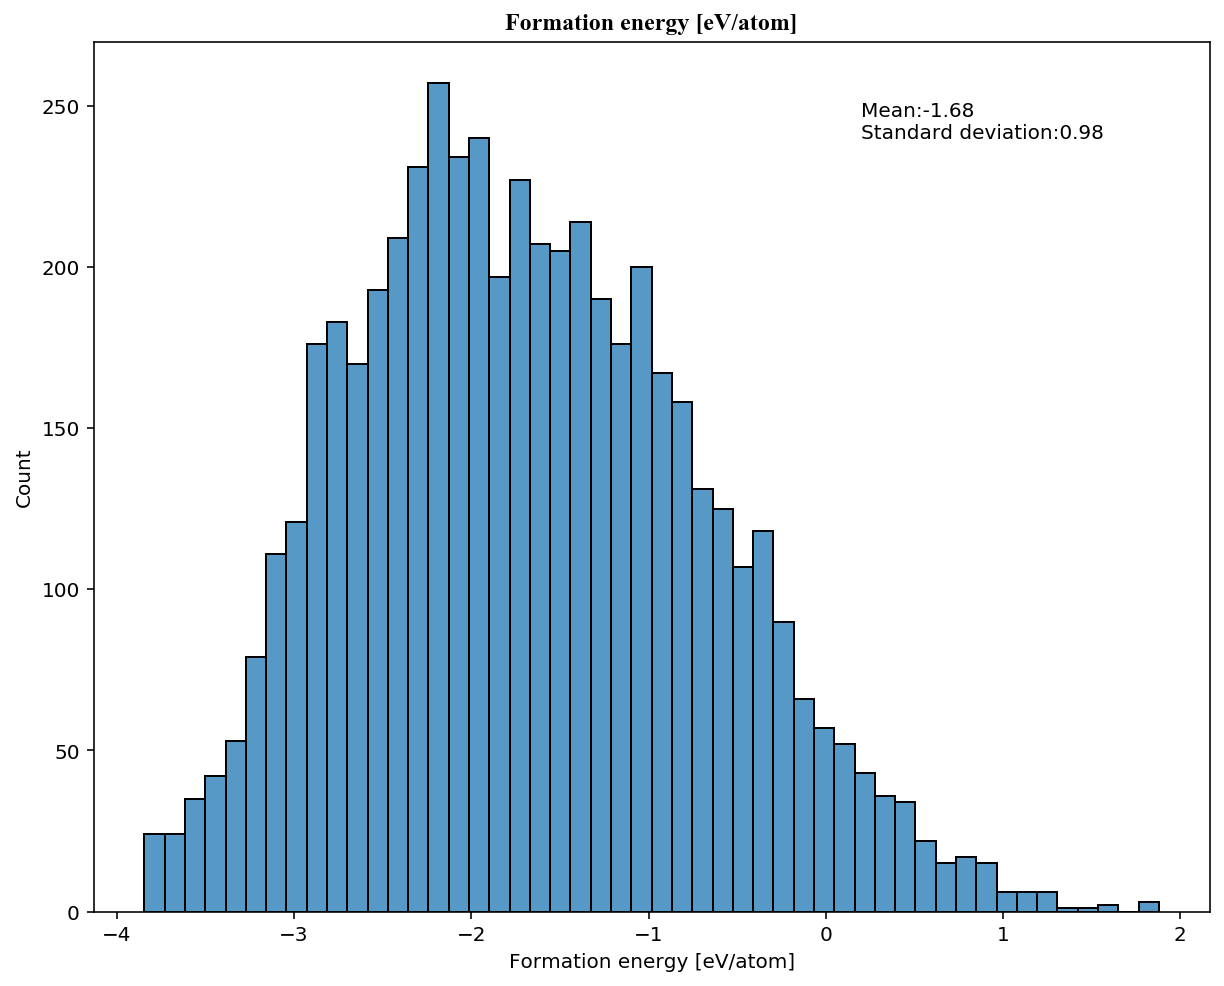

In [12]:
# Q2.5

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format ='retina'

f = plt.figure(figsize = (10,8))

# figure 1
axa = sns.histplot(dt['Formation energy [eV/atom]'], bins = 50)
axa.set_xlabel('Formation energy [eV/atom]', fontsize=10)
axa.set_ylabel('Count', fontsize=10)
axa.set_title('Formation energy [eV/atom]', family = 'Times New Roman',fontsize=12)

# text
mean_Formation_energy_per_atom_OQMD = dt['Formation energy [eV/atom]'].mean()
standarddeviation_Formation_energy_per_atom_OQMD = dt['Formation energy [eV/atom]'].std()
plt.text(0.2,240, \
         "Mean:"+str(round(mean_Formation_energy_per_atom_OQMD, 2))\
         + '\n'+ "Standard deviation:" \
         + str(round(standarddeviation_Formation_energy_per_atom_OQMD, 2)))
                         

## Q3-Comparing data sets
It is often useful to compare similar datasets to check them against each other.The simplest form of the perovskite crystal structure has formula ABO3, and such compounds are present in both the dataset you queried from the Materials Project in Q1 and the OQMD data you downloaded from figshare in Q2.

1. Identify the subset of formulas that are present in both the Materials Project datasetand OQMD dataset (hint: look at the Python set object). How many formulas are there?
2. Plot the distribution of the formation energies per atom of this subset of formulas for (a) the Materials Project dataset, and (b) the OQMD data, overlaying the two distributions on top of each other.Annotate your plot with the mean and standard deviation for each data set.
3. Perform a hypothesis test at the 95% level to determineif there is a significant difference between the formation energies reported in the Materials Project and the OQMD dataset (hint: check out the scipy.stats.ttest_ind method). Discuss your findings, including providing any possible explanations for any discrepancy between the two datasets.

## Q3-Comparing data sets

1. **1196** formula are in the subset
2. Shown in code.
3. Shown in Markdown below.

In [13]:
# Q3.1
# Identify the subset of formulas that are present in both the Materials Project dataset and OQMD dataset 
# (hint: look at the Python set object). How many formulas are there?

#Method 1
formula_a = set(df['pretty_formula'])
formula_b = set(dt["Chemical formula"])
subset_ab = list(formula_a & formula_b)
len(subset_ab)

# Method2
# for i in df['pretty_formula']:
#     for j in dt["Chemical formula"]:
#         if i == j:
#             subset_ab.append(i)

# len(set(subset_ab))

            
# list_unique_oqmd = list(set(dt["Chemical formula"]))
# nprettyformula1_oqmd = len(list_unique_oqmd)
# nprettyformula1_oqmd

1196

In [14]:
# Q3.2

# Aquire the formation energy of MP data and OQMD data
# a is MP data and b is OQMD data
# The length is different
subset_ab_a_formationenergy = df[df['pretty_formula'].isin(subset_ab)]['formation_energy_per_atom']
subset_ab_b_formationenergy = dt[dt['Chemical formula'].isin(subset_ab)]['Formation energy [eV/atom]']

print(len(subset_ab_a_formationenergy))
print(len(subset_ab_b_formationenergy))


2114
1196


Text(-0.2, 0.48, 'Mean of MP:-2.35\nStandard deviation of MP:0.84\nMean of OQMD:-1.97\nStandard deviation of OQMD:0.93')

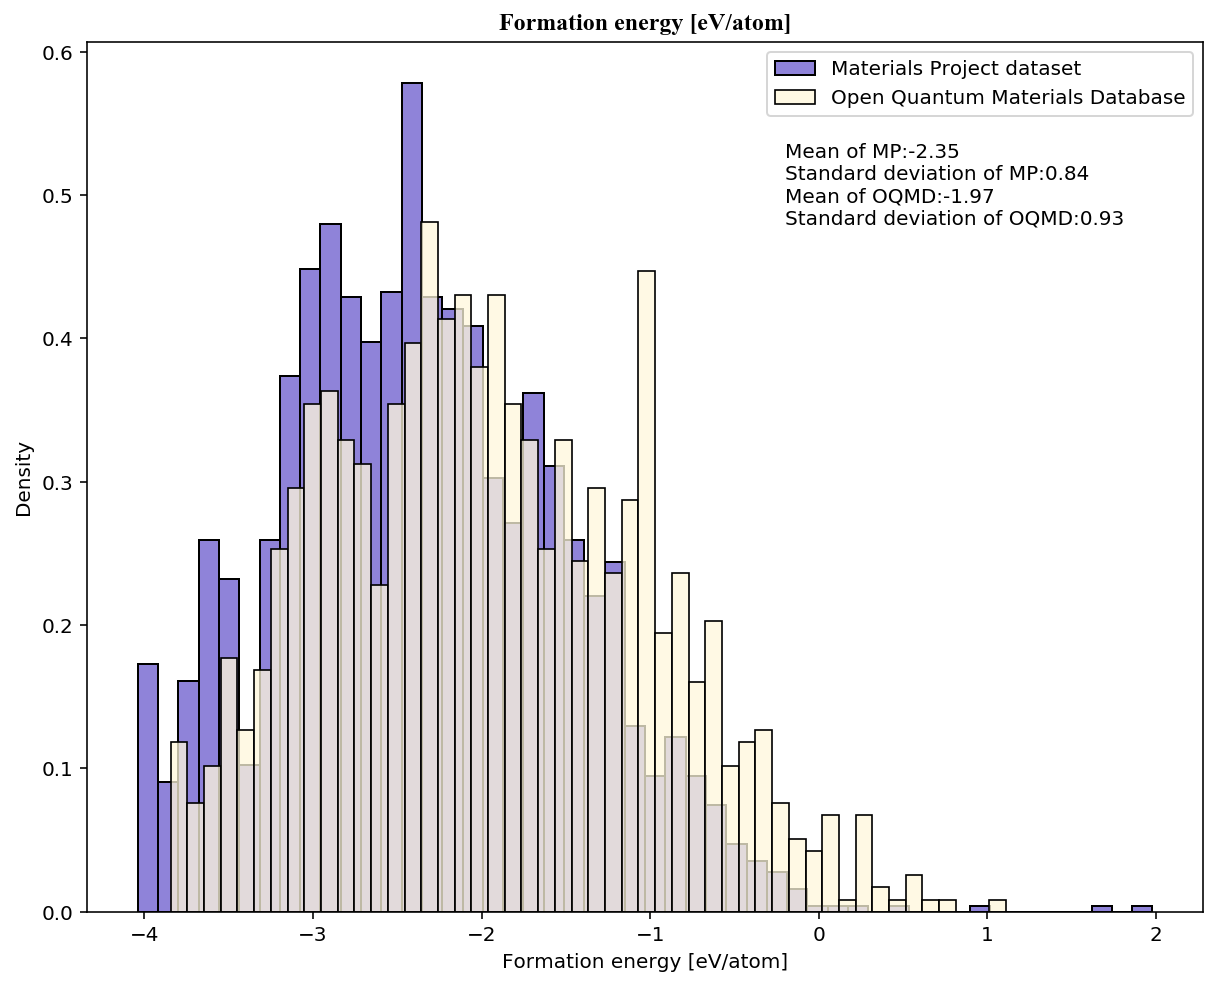

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format ='retina'

f = plt.figure(figsize = (10,8))

# figure 1
ax3a = sns.histplot(subset_ab_a_formationenergy,bins = 50, stat = 'density', color = 'slateblue',hue_norm=True)
ax3b = sns.histplot(subset_ab_b_formationenergy, bins = 50,stat = 'density', color = 'cornsilk',hue_norm=True)
ax3a.set_xlabel('Formation energy [eV/atom]', fontsize=10)
ax3a.set_ylabel('Density', fontsize=10)
ax3a.set_title('Formation energy [eV/atom]', family = 'Times New Roman',fontsize=12)
plt.legend(['Materials Project dataset', 'Open Quantum Materials Database'])


# the mean and standard deviation
mean_Formation_energy_per_atom_MP_subset = subset_ab_a_formationenergy.mean()
standarddeviation_Formation_energy_per_atom_MP_subset = subset_ab_a_formationenergy.std()

mean_Formation_energy_per_atom_OQMD_subset = subset_ab_b_formationenergy.mean()
standarddeviation_Formation_energy_per_atom_OQMD_subset = subset_ab_b_formationenergy.std()

plt.text(-0.2,0.48, \
         "Mean of MP:"+str(round(mean_Formation_energy_per_atom_MP_subset, 2))\
         + '\n' + "Standard deviation of MP:" + str(round(standarddeviation_Formation_energy_per_atom_MP_subset, 2)) 
         + '\n' + "Mean of OQMD:"+ str(round(mean_Formation_energy_per_atom_OQMD_subset, 2))\
         + '\n' + "Standard deviation of OQMD:" + str(round(standarddeviation_Formation_energy_per_atom_OQMD_subset, 2))\
        )

In [16]:
import scipy
scipy.stats.ttest_ind(subset_ab_a_formationenergy, subset_ab_b_formationenergy, equal_var=False)

Ttest_indResult(statistic=-11.697632077005903, pvalue=9.751591995306642e-31)

### Q3.3 Explanation
The p-value is much smaller than 0.05, thus there is a significant difference between the formation energies reported in the Materials Project and the OQMD dataset.

It may because of the existence of the data with the same formula (As we figured out the number of unique ABO3 is 1311 in Q1.2.1, which is much smaller than the amount of the subset in Q3.1). These extra data may change the distribution of formation energy and cause the deviation.